# 미니프로젝트

- 주제 : 데이터분석을 통해 심부전증을 예방할 수 있는가?
- 사용 데이터 : Heart Failure Prediction 데이터셋
- 사용 csv파일 : heart_failure_clinical_records_dataset.csv
- 컬럼정보 : 
    - age: 환자의 나이
    - anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    - creatinine_phosphokinase: 크레아틴키나제 검사 결과
    - diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    - ejection_fraction: 박출계수 (%)
    - high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    - platelets: 혈소판 수 (kiloplatelets/mL)
    - serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    - serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    - sex: 성별 (0: 여성, 1: 남성)
    - smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    - time: 관찰 기간 (일)
    - DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

# 1. 데이터셋 준비하기

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

### Pandas 라이브러리로 csv파일 읽어들이기

In [30]:
df = pd.read_csv("C:/Users/YHJ/Desktop/heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [31]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# 2. 수치형 데이터의 히스토그램 그리기 

<AxesSubplot:xlabel='age', ylabel='Count'>

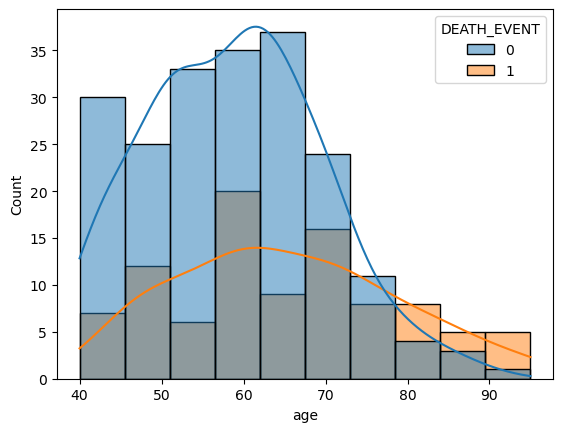

In [61]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

# hue : 데이터를 시각화할 때, 추가적인 범주형 변수를 기준으로 데이터를 분리하여 시각화하는 데 사용
# kde=True : 데이터의 히스토그램을 그릴 때 커널 밀도 추정을 추가하여 데이터의 분포를 부드럽게 표현

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

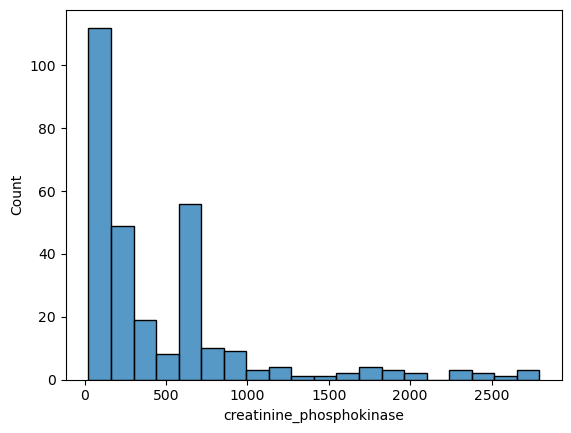

In [13]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

# 'creatinine_phosphokinase'열의 값이 3000보다 작은 데이터 선택 

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

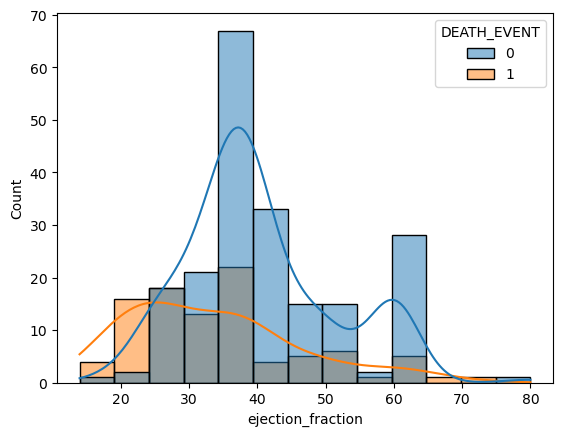

In [14]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT',kde=True)

# bins: 히스토그램의 막대(bin) 개수를 지정합니다. 각 막대는 데이터의 구간을 나타내며, 해당 구간에 속하는 데이터의 빈도를 표시

<AxesSubplot:xlabel='platelets', ylabel='Count'>

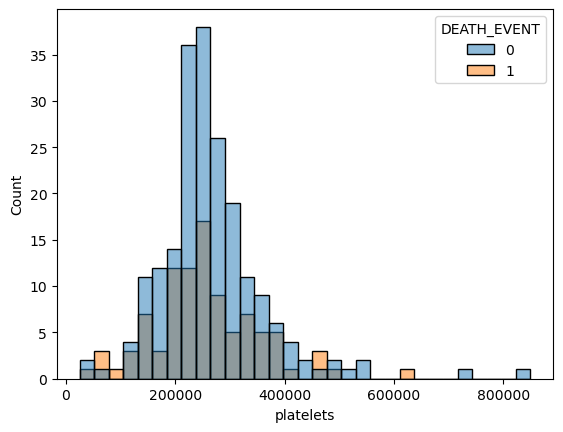

In [15]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='time', ylabel='Count'>

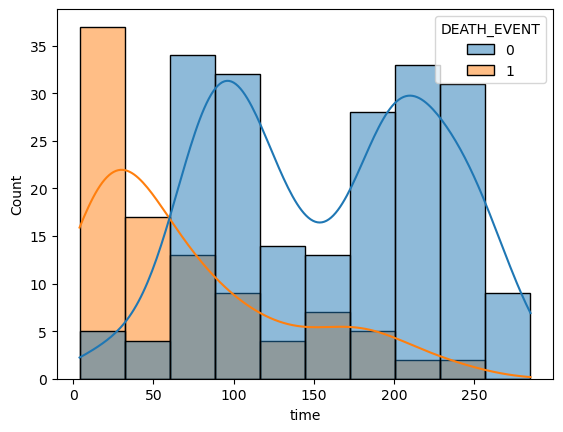

In [16]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

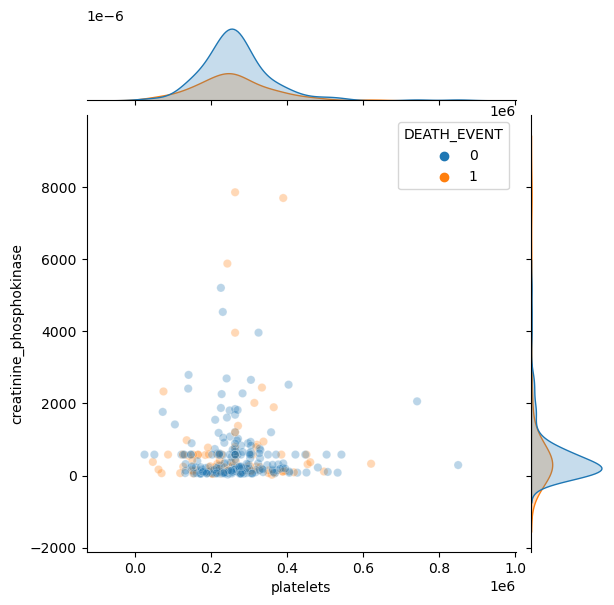

In [18]:
sns.jointplot(x='platelets',y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

# jointplot :  산점도(Scatter plot)와 각 변수의 히스토그램(Histogram)을 함께 그려줌
# alpha : 산점도의 투명도 조절

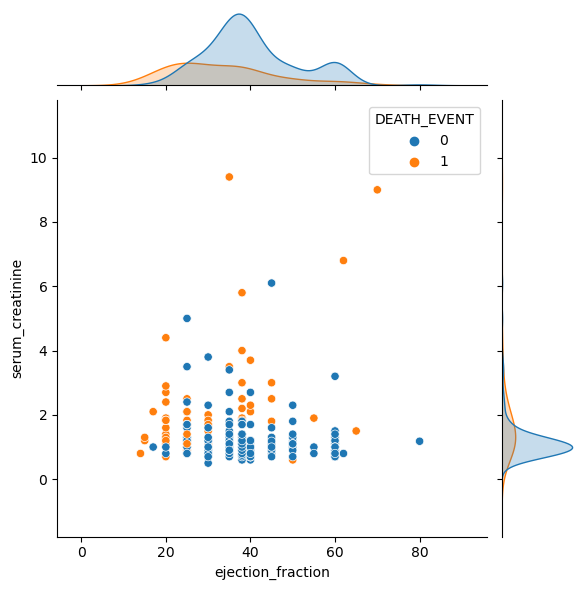

In [19]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')

### Boxplot계열을 이용해서 범주별 통계 확인하기
- seaborn의 Boxplot 게열(boxplot(), violinplot(), swarmplot())을 사용
- Hue 키워드를 사용해서 범주 세분화 가능

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

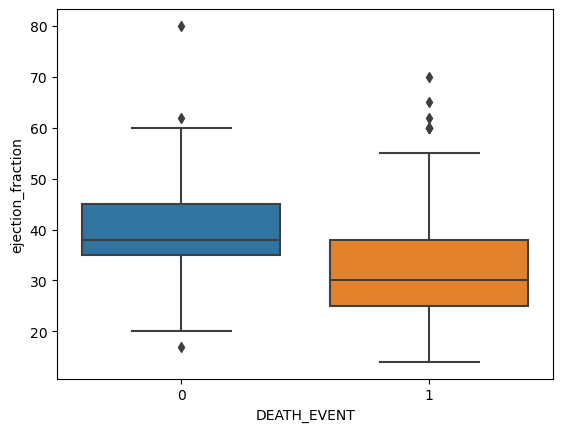

In [20]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<AxesSubplot:xlabel='smoking', ylabel='ejection_fraction'>

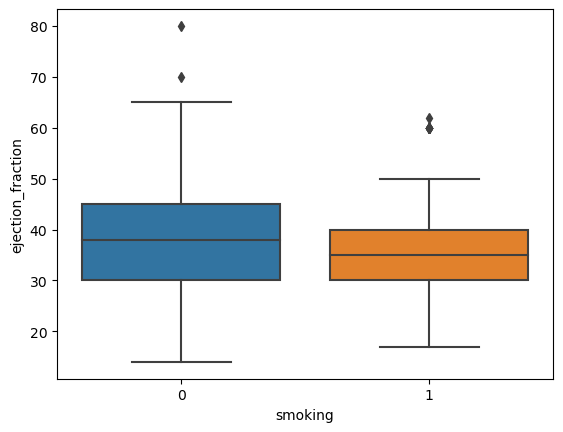

In [21]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

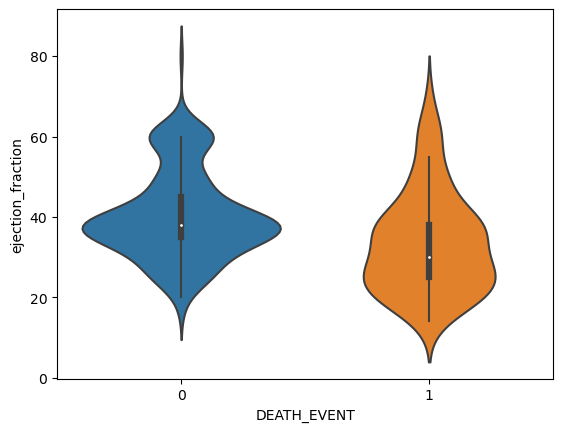

In [22]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

# violinplot:바이올린 모양은 데이터의 분포를 상대적으로 정확하게 시각화

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

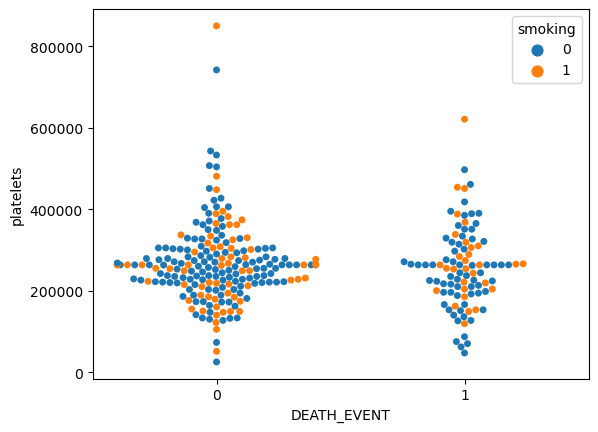

In [24]:
sns.swarmplot(x='DEATH_EVENT', y='platelets',hue='smoking', data=df)

# swarmplot: 데이터 포인트를 범주형 축에서 겹치지 않도록 배치하여 모든 데이터를 볼 수 있도록 만들어줌

# 3. 모델 학습을 위한 데이터 전처리 
# 1) StandardScaler를 이용해 데이터 전처리

In [33]:
from sklearn.preprocessing import StandardScaler
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### 수치형 입력데이터, 범주형 입력데이터, 출력 데이터로 구분

In [38]:
X_num=df[['age','creatinine_phosphokinase','ejection_fraction',  'platelets',
       'serum_creatinine', 'serum_sodium']]
X_cat=df[['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

### 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기

In [40]:
scaler = StandardScaler()
# 평균을 0으로, 표준편차를 1로 변환

scaler.fit(X_num)
# X_num의 평균과 표준편차를 계산하여 스케일링에 필요한 정보를 학습

X_scaled = scaler.transform(X_num)
# 학습된 스케일러를 사용하여 X_num을 표준화된 형태(평균=0, 표준편차=1)로 변환

X_scaled = pd.DataFrame(data=X_scaled,index=X_num.index,columns=X_num.columns)
# 표준화된 X_num을 데이터프레임 형태로 변환

X = pd.concat([X_scaled, X_cat], axis=1)
# 표준화된 연속형 변수들로 구성된 데이터프레임 X_scaled와 
# 범주형 변수들로 구성된 데이터프레임 X_cat를 axis=1을 기준으로 결합하여 
# 최종적인 특성 행렬 X를 생성

In [41]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


# 2) 학습데이터와 테스트데이터 분리하기

In [43]:
from sklearn.model_selection import train_test_split

# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 4. Classification 모델 학습하기
# 1) Losistic Regression 모델 생성/학습하기

In [47]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000) #max_iter:모델의 최적화를 위해 사용되는 반복 횟수를 지정
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 2) 모델 학습결과 평가하기

In [49]:
from sklearn.metrics import classification_report

# Predict를 수행하고 classification_report() 결과를 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



# 3) XGboost 모델 생성/학습하기

In [51]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 4.5 MB/s eta 0:00:00


In [52]:
import xgboost
from xgboost import XGBClassifier

In [53]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# 4) 모델 학습 결과 평가하기

In [54]:
# Predcit를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



# 5) 특징의 중요도 확인하기

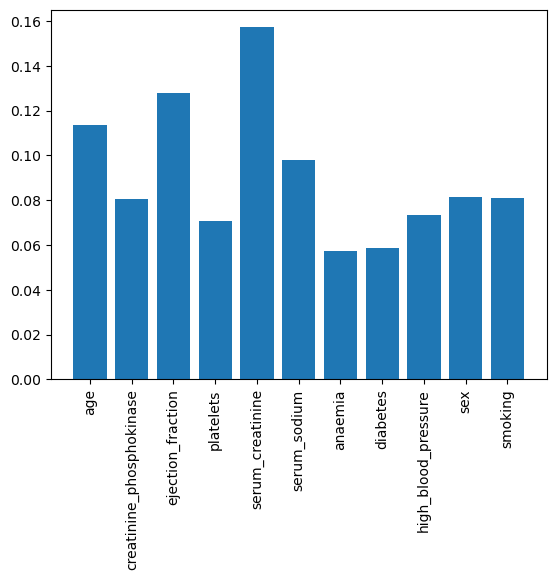

In [64]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 5. 모델 학습 결과 심화 분석하기
# 1) Precision_recall 커브 확인하기

In [56]:
from sklearn.metrics import plot_precision_recall_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


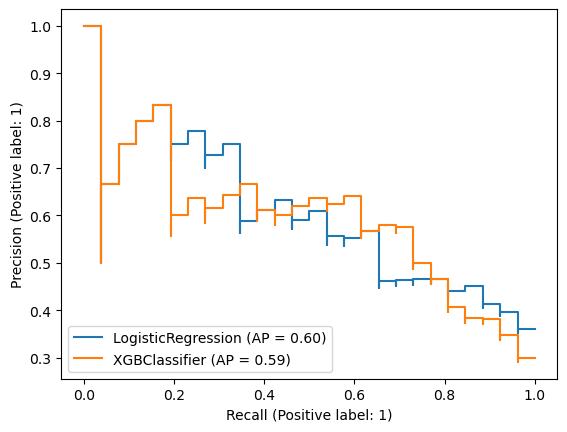

In [57]:
# 두 모델의 Precision_Recall 커브를 한번에 그리기
# fig.gca()로 ax를 반환받아 사용

fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

# 2) ROC 커브 확인하기

In [58]:
from sklearn.metrics import plot_roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


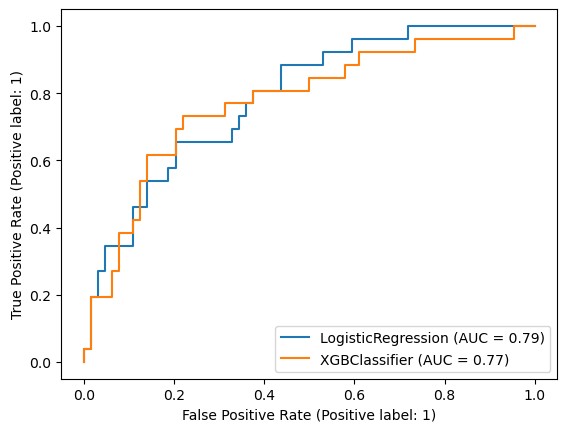

In [60]:
# 두 모델의 ROC 커브를 한번에 그리기
# fig.gca()로 ax를 반환받아 사용

fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)

- fig = plt.figure(): 새로운 Matplotlib Figure 객체 fig를 생성합니다. Figure 객체는 그림 전체를 나타내는 컨테이너 역할을 합니다.

- ax = fig.gca(): fig에서 현재 Axes 객체를 얻어옵니다. Axes 객체는 실제 그래프가 그려지는 영역을 의미합니다.

- plot_roc_curve(model_lr, X_test, y_test, ax=ax): sklearn.metrics.plot_roc_curve 함수를 사용하여 로지스틱 회귀 모델 model_lr의 ROC 곡선을 그래프에 추가합니다. X_test와 y_test는 테스트용 데이터와 해당 데이터의 타겟 변수를 의미합니다. ax=ax를 사용하여 이 그래프를 앞서 얻어온 ax에 추가합니다.

- plot_roc_curve(model_xgb, X_test, y_test, ax=ax): 동일한 방법으로 XGBoost 모델 model_xgb의 ROC 곡선을 그래프에 추가합니다. 이 그래프도 앞서 얻어온 ax에 추가하여 같은 그래프에 함께 시각화됩니다.

이렇게 함께 시각화된 ROC 곡선은 두 분류 모델의 성능을 비교하고 평가하는 데 사용됩니다. ROC 곡선은 이진 분류 모델에서 사용되며, 특히 이진 분류의 임계값(threshold)을 변화시켰을 때, 진짜 양성 비율(TPR, True Positive Rate)에 대한 거짓 양성 비율(FPR, False Positive Rate)의 변화를 시각화합니다. 이를 통해 모델의 분류 성능과 임계값에 따른 트레이드오프를 확인할 수 있습니다. ROC 곡선의 면적인 AUC(Area Under the Curve) 값은 모델의 성능을 한 숫자로 요약하는 데 사용되며, 값이 1에 가까울수록 더 우수한 모델입니다.